Questions

    Q1: How many hours per day do you spend on social media?
    Q2: How do you feel being the center of attention
    Q3: Working while being observed
    Q4: Talking face to face with someone you don't know very well
    Q5: Expressing disagreement or disapproval to someone you don't know very well
    Q6: Are you extremely conscious of your actions when in social settings because you fear they might offend someone or you could be rejected?,
    Q7: Do you feel anxious or panicky before social situations?
   Scale = 1-5 
     
     5 = very Uncomfortable
     1 = Very Comfortable

In [48]:
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns

In [49]:

sa = pd.read_csv('/home/mishal/Documents/code/Kaggle/Social_Anxiety_Survey_Master.csv')
sa_data = sa
sa.head(20)

,Timestamp,Gender,Student,Age,Marital,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Total Score
0,12/28/2019 0:24:46,Male,Yes,21 - 30,Single,Less than 3 hours per day,5,5,5,5,5,5,30
1,12/22/2019 15:43:22,Female,No,21 - 30,Married,4 hours and above per day,5,5,5,5,5,3,28
2,12/12/2019 22:36,Male,No,21 - 30,Single,4 hours and above per day,5,5,5,4,4,4,27
3,12/26/2019 12:16:26,Female,No,21 - 30,Single,Less than 1 hours per day,5,5,4,3,5,5,27
4,12/20/2019 22:35:50,Female,Yes,20 or below,Single,4 hours and above per day,4,4,4,5,5,5,27
5,12/19/2019 14:01:37,Female,Yes,21 - 30,Single,4 hours and above per day,3,5,5,5,4,4,26
6,12/11/2019 12:24,Male,No,21 - 30,Single,4 hours and above per day,5,4,4,4,5,4,26
7,12/20/2019 11:18:57,Female,Yes,21 - 30,Single,4 hours and above per day,3,5,4,4,5,5,26
8,12/13/2019 21:49:17,Female,Yes,21 - 30,Single,4 hours and above per day,5,5,3,5,4,3,25
9,12/31/2019 16:11:56,Male,Yes,20 or below,Single,Less than 3 hours per day,4,5,4,5,4,2,24


<AxesSubplot:>

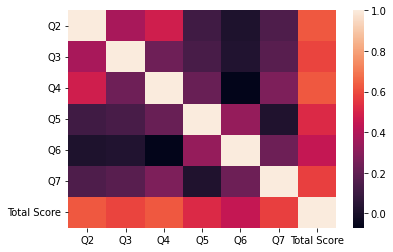

In [50]:
sns.heatmap(sa_data.corr())

this show that there is correlation between the data and a persons social anxiety

 The benchmarks for those categories are set as Mild at 18 and High at 24. The benchmarks was decided according to the total scores

The ones how have soical anxiety are :-

Tomorrow
  how to create a pixe chart 
  compare high anxiety with men and women
  compare high anxiety with student and non student
  compare high anxiety with marital status  
  compare high anxiety with hours on social media


In [64]:
# first lets make a new dataset where all are having a high level of social anciety.
# for that lets filter the data
sa2 = (
    sa[sa['Total Score'] > 18]
)
sa2.head()

,Timestamp,Gender,Student,Age,Marital,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Total Score
0,12/28/2019 0:24:46,Male,Yes,21 - 30,Single,Less than 3 hours per day,5,5,5,5,5,5,30
1,12/22/2019 15:43:22,Female,No,21 - 30,Married,4 hours and above per day,5,5,5,5,5,3,28
2,12/12/2019 22:36,Male,No,21 - 30,Single,4 hours and above per day,5,5,5,4,4,4,27
3,12/26/2019 12:16:26,Female,No,21 - 30,Single,Less than 1 hours per day,5,5,4,3,5,5,27
4,12/20/2019 22:35:50,Female,Yes,20 or below,Single,4 hours and above per day,4,4,4,5,5,5,27


In [127]:
# now when we visualize the data we need to convert the gender to a numeric 
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
sa2['gender_factor'] = le.fit_transform(sa2.Gender)
sa2['phone_usage'] = le.fit_transform(sa2.Q1)
# sa2['Gender_factor] = pd.factorize(sa2.Gender)[0]
sa2.head()

/tmp/ipykernel_29270/1533750665.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sa2['gender_factor'] = le.fit_transform(sa2.Gender)
/tmp/ipykernel_29270/1533750665.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sa2['phone_usage'] = le.fit_transform(sa2.Q1)


,Timestamp,Gender,Student,Age,Marital,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Total Score,gender_factor,phone_usage
0,12/28/2019 0:24:46,Male,Yes,21 - 30,Single,Less than 3 hours per day,5,5,5,5,5,5,30,1,3
1,12/22/2019 15:43:22,Female,No,21 - 30,Married,4 hours and above per day,5,5,5,5,5,3,28,0,0
2,12/12/2019 22:36,Male,No,21 - 30,Single,4 hours and above per day,5,5,5,4,4,4,27,1,0
3,12/26/2019 12:16:26,Female,No,21 - 30,Single,Less than 1 hours per day,5,5,4,3,5,5,27,0,1
4,12/20/2019 22:35:50,Female,Yes,20 or below,Single,4 hours and above per day,4,4,4,5,5,5,27,0,0


In [129]:
sa2 # here 0 stands for 4 hours and more , 4 stands for less than 4 hours

,Timestamp,Gender,Student,Age,Marital,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Total Score,gender_factor,phone_usage
0,12/28/2019 0:24:46,Male,Yes,21 - 30,Single,Less than 3 hours per day,5,5,5,5,5,5,30,1,3
1,12/22/2019 15:43:22,Female,No,21 - 30,Married,4 hours and above per day,5,5,5,5,5,3,28,0,0
2,12/12/2019 22:36,Male,No,21 - 30,Single,4 hours and above per day,5,5,5,4,4,4,27,1,0
3,12/26/2019 12:16:26,Female,No,21 - 30,Single,Less than 1 hours per day,5,5,4,3,5,5,27,0,1
4,12/20/2019 22:35:50,Female,Yes,20 or below,Single,4 hours and above per day,4,4,4,5,5,5,27,0,0
5,12/19/2019 14:01:37,Female,Yes,21 - 30,Single,4 hours and above per day,3,5,5,5,4,4,26,0,0
6,12/11/2019 12:24,Male,No,21 - 30,Single,4 hours and above per day,5,4,4,4,5,4,26,1,0
7,12/20/2019 11:18:57,Female,Yes,21 - 30,Single,4 hours and above per day,3,5,4,4,5,5,26,0,0
8,12/13/2019 21:49:17,Female,Yes,21 - 30,Single,4 hours and above per day,5,5,3,5,4,3,25,0,0
9,12/31/2019 16:11:56,Male,Yes,20 or below,Single,Less than 3 hours per day,4,5,4,5,4,2,24,1,3


In [128]:

sa3 = (
    sa2[sa2['Gender'] == 'Male']
)

sa3.head()



,Timestamp,Gender,Student,Age,Marital,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Total Score,gender_factor,phone_usage
0,12/28/2019 0:24:46,Male,Yes,21 - 30,Single,Less than 3 hours per day,5,5,5,5,5,5,30,1,3
2,12/12/2019 22:36,Male,No,21 - 30,Single,4 hours and above per day,5,5,5,4,4,4,27,1,0
6,12/11/2019 12:24,Male,No,21 - 30,Single,4 hours and above per day,5,4,4,4,5,4,26,1,0
9,12/31/2019 16:11:56,Male,Yes,20 or below,Single,Less than 3 hours per day,4,5,4,5,4,2,24,1,3
12,12/25/2019 22:04:29,Male,Yes,21 - 30,Single,Less than 3 hours per day,3,5,4,4,4,4,24,1,3


In [87]:
len(sa3)# therefore the total number of males is equal to 19 and the total 43, hence number of females is 24 

19

<function matplotlib.pyplot.show(close=None, block=None)>

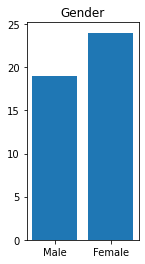

In [123]:
plt.figure(figsize = (2,4))
labels = ["Male", "Female"]
values = [19,24]
plt.bar(labels,values)
plt.title("Gender")
plt.show


In [132]:
sa4=(
    sa2[sa2["Student"] == "Yes"]
)
sa4.head()# only 2 perons are not students

,Timestamp,Gender,Student,Age,Marital,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Total Score,gender_factor,phone_usage
0,12/28/2019 0:24:46,Male,Yes,21 - 30,Single,Less than 3 hours per day,5,5,5,5,5,5,30,1,3
4,12/20/2019 22:35:50,Female,Yes,20 or below,Single,4 hours and above per day,4,4,4,5,5,5,27,0,0
5,12/19/2019 14:01:37,Female,Yes,21 - 30,Single,4 hours and above per day,3,5,5,5,4,4,26,0,0
7,12/20/2019 11:18:57,Female,Yes,21 - 30,Single,4 hours and above per day,3,5,4,4,5,5,26,0,0
8,12/13/2019 21:49:17,Female,Yes,21 - 30,Single,4 hours and above per day,5,5,3,5,4,3,25,0,0


<function matplotlib.pyplot.show(close=None, block=None)>

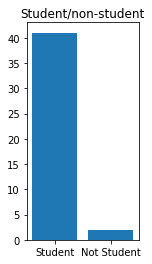

In [133]:
plt.figure(figsize = (2,4))
labels = ["Student", "Not Student"]
values = [41,2]
plt.bar(labels,values)
plt.title("Student/non-student")
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

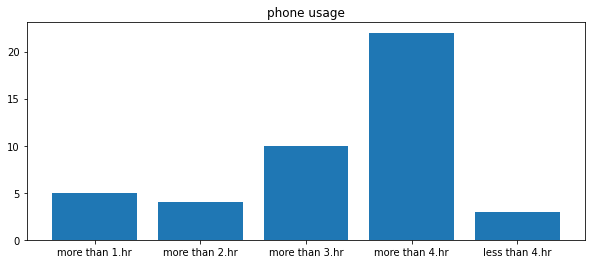

In [158]:
plt.figure(figsize = (10,4))
labels = ["more than 1.hr", "more than 2.hr","more than 3.hr","more than 4.hr","less than 4.hr"]
values = [5,4,10,22,3]
plt.bar(labels,values)
plt.title("phone usage")
plt.show